<a href="https://colab.research.google.com/github/sandipanpaul21/Data_Science_INSHORT/blob/main/EDA_04_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Feature Engineering in python IN SHORT**

- Feature engineering is the process of selecting, manipulating, and transforming raw data into features.

**Why Feature Engineering is important?**

- Consider a column which contains Fixed Deposit investments. 
- **Table 1 contains the invested amount in terms of Dollars**. Amounts are as follows: 100,300,200,300 and 100
- **Table 2 contains the invested amount in terms of Rupee**. Amounts are as follows: 80000, 240000, 160000, 240000 and 80000
- When we carefully observe the two tables, they are the same investment only difference is they are on a different scale. Dollar 1 = Rupee 80 (consider). 
- But for the machine learning model, will not consider the unit or currency rather it will consider the numbers. Dollar 100 = Rupee 80000 but for the machine learning model, 80000 is way more than 100 which may lead to Bias. 
- So we can use Feature Engineering Methods like Scaling to convert the column into the same scale irrespective of the unit (currency)

**Type of Feature Engineering**

They are mainly categorized into 3 parts. 
  1. **First is the Variable Transformation.** For example, Log transformation Variable and Square Root transformation Variable. 
  2. **The second is the Scaling Transformation.** For example, Min Max Scaler or Normalization and Standardization. 
  3. **The third is Feature Construction.** For example, Binning.

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib 
%matplotlib inline
from sklearn import datasets
import sklearn as sk
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler as min_max
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the Datasets, Boston Dataset
boston = datasets.load_boston()
boston_pd = pd.DataFrame(boston.data)
boston_pd.columns = boston.feature_names
boston_pd["MEDV"] = boston.target
boston_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**SKEWNESS**

In the curve of a distribution, the data on the right side of the curve may taper differently from the data on the left side. These taperings are known as "**tails**".

If the data graphs symmetrically, the distribution has zero skewness, regardless of how long or fat the tails are.

- If **Skewness = 0**, data is perfectly symmetrical

- If **Skewness is less than -1 or greater than +1**, distribution is highly skewed

- If **Skewness is between -1 and -0.5 or between 0.5 and 1**, distribution is moderately skewed

- If **Skewness is between -0.5 and 0.5** then it is approximately symmetric

Skewness of CRIM : 5.22


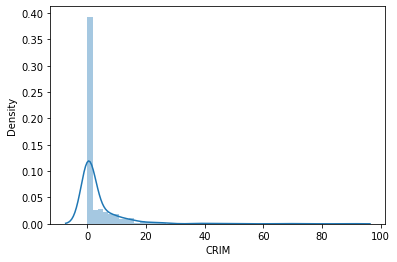

In [3]:
# Skewness, by plotting histogram we can check the skewness of the data. 
# Consider single column like CRIM for analysis
print("Skewness of CRIM :",boston_pd['CRIM'].skew().round(2))
sns.distplot(boston_pd['CRIM'])

# Inference : It is evident how skewed the data is (Right Skewed). Skewness = 5.22 way too high. 
# We can now apply various transformation and see how it affects the skewness of the data.

**Log Transformation**
- We do Log transformation on the variable, to reduce skewness and normalize the data.
- A logarithm can be defined with respect to a base (b) where the base b-logarithm of X is equal to y. You can take any positive number as the base of the logarithm but the most commonly used bases are —
  - Base 2: the base 2 logarithm of 8 is 3, because 2 raise to 3 = 8
  - Base 10: the base 10 logarithm of 100 is 2, because 10 raise to 2 = 100
  - Natural Log: the base of the natural log is the mathematical constant “e” or Euler’s number which is equal to 2.718282. So, the natural log of 7.389 is 2, because e raise to 2 = 7.389.

Skewness of CRIM : 5.22
After LOG TRANSFORMATION, Skewness is : 0.41


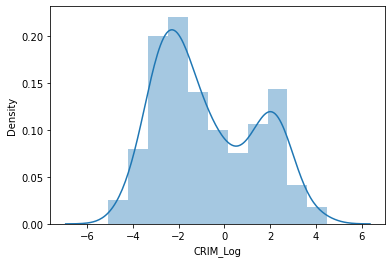

In [4]:
# Log Transformation
boston_pd['CRIM_Log'] = np.log(boston_pd['CRIM'])
print("Skewness of CRIM :",boston_pd['CRIM'].skew().round(2))
print('After LOG TRANSFORMATION, Skewness is :',boston_pd['CRIM_Log'].skew().round(2))
sns.distplot(boston_pd['CRIM_Log'])

# Inference : The distribution certainly now appears to be much more normal. Skewness = 0.41 is No Skewness.

**Square Root Transformation**

Each data point is replaced by its square root. Negative data is converted to positive by adding a constant, and then transformed.

Skewness of CRIM : 5.22
After SQUARE ROOT TRANSFORMATION, Skewness is : 2.02


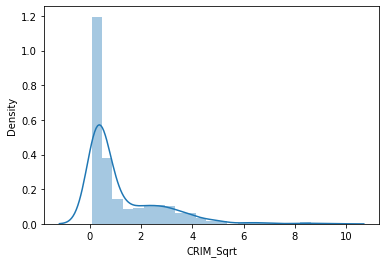

In [5]:
# Square-Root Transformation
boston_pd['CRIM_Sqrt'] = np.sqrt(boston_pd['CRIM'])
print("Skewness of CRIM :",boston_pd['CRIM'].skew().round(2))
print('After SQUARE ROOT TRANSFORMATION, Skewness is :',boston_pd['CRIM_Sqrt'].skew().round(2))
sns.distplot(boston_pd['CRIM_Sqrt'])

# Inference : The distribution certainly now appears to be little normal. Skewness = 2.02 is High Skewed. 

**Cube Root Transformation**

Each data point is replaced by its cube root. Negative data is converted to positive by adding a constant, and then transformed.

Skewness of CRIM : 5.22
After CUBE ROOT TRANSFORMATION, Skewness is : 1.363




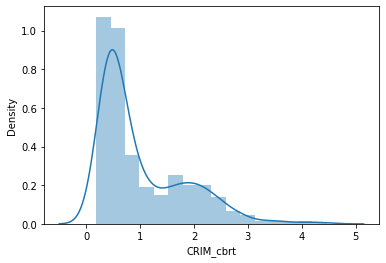

In [6]:
# Cube-Root Transformation
boston_pd['CRIM_cbrt'] = np.cbrt(boston_pd['CRIM'])
print("Skewness of CRIM :",boston_pd['CRIM'].skew().round(2))
print('After CUBE ROOT TRANSFORMATION, Skewness is :',boston_pd['CRIM_cbrt'].skew().round(3))
print('\n')
sns.distplot(boston_pd['CRIM_cbrt'])
# Inference : The distribution certainly now appears to be much more normal. Skewness = 1.363 is Moderately Skewed. 

In [7]:
# All the Skewness Value Calculated
print("Comparing all Skewness values")
pd.DataFrame([boston_pd['CRIM'].skew().round(2),boston_pd['CRIM_Log'].skew().round(2),
              boston_pd['CRIM_Sqrt'].skew().round(2),boston_pd['CRIM_cbrt'].skew().round(2)],
             index=['Normal','Log','Square Root','Cube Root'],
             columns = ["Variable Skewness"])

# Inference : Best transformations can be Log Transformation

Comparing all Skewness values


,Variable Skewness
Normal,5.22
Log,0.41
Square Root,2.02
Cube Root,1.36


**Scaling Transformation**
- Scaling Transformation is a technique to standardize the independent features present in the data in a fixed range. 
- It is performed during the data pre-processing to handle highly varying magnitudes or values or units. 
- If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.

Example: If an algorithm is not using the feature scaling method then it can consider the value 3000 meters to be greater than 5 km but that’s actually not true and in this case, the algorithm will give wrong predictions. So, we use Feature Scaling to bring all values to the same magnitudes and thus, tackle this issue.

**Techniques to perform Feature Scaling**
1. **Min-Max Normalization:** This technique re-scales a feature or observation value with distribution value between 0 and 1.
  - Formula = x(i) - min(x) / max(x) - min(x)
  - When x(i) = min(x) then formula calculation becomes 0
  - When x(i) = max(x) then numerator is equal to denominator, value is 1
  - So dustribution range from 0 to 1

2. **Standardization:** It is a very effective technique which re-scales a feature value so that it has distribution with mean = 0 and variance = 1.
  - Formula =  x(i) - mean(x) / standard deviation

In [8]:
# Min Max Scaler
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1))
# Taking first 5 rows for following test
x = boston_pd[['CRIM','LSTAT']].head(5)
print("\nOriginal data values : \n",  x)
x_after_min_max_scaler = min_max_scaler.fit_transform(x)
print("\nAfter min max Scaling : \n", x_after_min_max_scaler)


Original data values : 
       CRIM  LSTAT
0  0.00632   4.98
1  0.02731   9.14
2  0.02729   4.03
3  0.03237   2.94
4  0.06905   5.33

After min max Scaling : 
 [[0.         0.32903226]
 [0.33460864 1.        ]
 [0.33428981 0.17580645]
 [0.4152718  0.        ]
 [1.         0.38548387]]


In [9]:
# Standarization
print("\nOriginal data values : \n",  x)
Standardisation = preprocessing.StandardScaler()
x_after_Standardisation = Standardisation.fit_transform(x)
print ("\nAfter Standardisation : \n", x_after_Standardisation)


Original data values : 
       CRIM  LSTAT
0  0.00632   4.98
1  0.02731   9.14
2  0.02729   4.03
3  0.03237   2.94
4  0.06905   5.33

After Standardisation : 
 [[-1.2834352  -0.14482721]
 [-0.25317266  1.83701878]
 [-0.25415433 -0.59741223]
 [-0.00481018 -1.11669399]
 [ 1.79557237  0.02191464]]


**Feature Construction**
- Binning is one of the common method in Feature Construction
- Binning transforms the continuous variables into groups, ranges or intervals called bins.
- For example, consider a fixed deposit dataset containing a variable which stores age of the people. This age is a continuous variable which can range from 1 to 100+. Using binning technique, we can convert all the values in this variable into ranges such as minor,senior citizen etc which help in data analysis like what is the percentage of senior citizen invested in FD

**Types of Binning**
1. Fixed-Width Binning
2. Adaptive Binning

**Fixed-Width Binning**
We manually create fix width bins based on some rules and domain knowledge. 
- Consider that we have following 15 values in the age column:
- age = [12, 15, 13, 78, 65, 42, 98, 24, 26, 38, 27, 32, 22, 45, 27]
- Now, lets create bins of fixed width (say 10):
- bins = [0 {0-9}, 1 {10-19}, 2 {20-29}, 3 {30-39}, 4 {40-49}, 5 {50-59}, 6 {60-69}, 7 {70-79}, 8 {80-89}, 9 {90-99}]
- After binning, our age variable looks like this: age = [1, 1, 1, 7, 6, 4, 9, 2, 2, 3, 2, 3, 2, 4, 2]

**Adaptive Binning**
- In Fixed-Width Binning, bin ranges are manually decided. So, we usually end up in creating irregular bins which are not uniform based on the number of data points or values which fall under each bin. 
- Some of the bins might be densely populated and some of them might be sparsely populated or even empty. For example, bins 0, 5 and 8 are empty in our case. 
- In Adaptive Binning, data distribution itself decides bin ranges for itself. No manual intervention is required. So, the bins which are created are uniform in terms of number of data points in it.
- Quantiles are specific values or cut-points which help in partitioning the continuous valued distribution of a specific numeric field into discrete contiguous bins or intervals. Thus, q-Quantiles help in partitioning a numeric attribute into q equal partitions.




In [10]:
# Adaptive Binning
# Value = 2 quantiles include the 2-Quantile known as the median which divides the data distribution into two equal bins
AgeData = boston_pd[['AGE']]
AgeData['Auto_BINS'] = pd.cut(AgeData['AGE'],2)
AgeData.head()
# Take the Value = 4 known as the quartiles which divide the data into 4 equal bins

,AGE,Auto_BINS
0,65.2,"(51.45, 100.0]"
1,78.9,"(51.45, 100.0]"
2,61.1,"(51.45, 100.0]"
3,45.8,"(2.803, 51.45]"
4,54.2,"(51.45, 100.0]"


In [11]:
# Fixed Width Binning
# Bins divided into Young Age, Middle Age and Senior Age 
AgeData['Manual_BINS']=pd.cut(AgeData['AGE'],bins=[0,18,60,120],labels=["0-18","18-60","60+"])
AgeData.head()

,AGE,Auto_BINS,Manual_BINS
0,65.2,"(51.45, 100.0]",60+
1,78.9,"(51.45, 100.0]",60+
2,61.1,"(51.45, 100.0]",60+
3,45.8,"(2.803, 51.45]",18-60
4,54.2,"(51.45, 100.0]",18-60
